Import Data

In [2]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()


------class run complete------



Feature Scaling

In [3]:
#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.

Initial Model

In [4]:
#import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# train the model
lr_1 = LogisticRegression()

#fitting the model to the training set.
lr_1.fit(X_train, y_train) 

# make predictions on the test dataset
y_pred_1 = lr_1.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Initial Logistic Regression Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Initial Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------Initial Logistic Regression Metrics----------

Accuracy: 0.8666666666666667
Precision: 0.868421052631579
Recall: 0.9166666666666666
F1 Score: 0.8918918918918918

----------Initial Classification Report----------

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.87      0.92      0.89        36

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60



Hyperparameter Tuning using Grid Search

In [5]:
#perform grid search to find the best parameters for the model
#NOTE: Grid Search also performs cross validation to find the best parameters.

from sklearn.model_selection import GridSearchCV
#creating a dictionary of parameters to be used in the grid search:
param_grid = {'C': [0.0001,0.001, 0.01],
                'solver': ['liblinear','saga', 'sag', 'lbfgs', 'newton-cg','newton-cholesky'],
                'max_iter': [100],
                'random_state': [42]
                }
#creating an instance of the GridSearchCV class:
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5, scoring='f1')

#fitting the grid search to the training set:
lr_tuned = grid.fit(X_train, y_train)
#finding the best estimator:
print("\nbest estimator: ", lr_tuned.best_estimator_)
#finding the best score:
print("best score:  ", lr_tuned.best_score_)


best estimator:  LogisticRegression(C=0.01, random_state=42, solver='liblinear')
best score:   0.8316819867763264


Testing of Final Model

In [6]:
#test the new model with hyperparameters tuned by grid search:
#make predictions on the test dataset
y_pred = lr_tuned.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Logistic Regression Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)



----------Logistic Regression Metrics----------

Accuracy: 0.9
Precision: 0.875
Recall: 0.9722222222222222
F1 Score: 0.9210526315789473

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.95      0.79      0.86        24
           1       0.88      0.97      0.92        36

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60



**Evaluation**

Confusion Matrix

[[19  5]
 [ 1 35]]


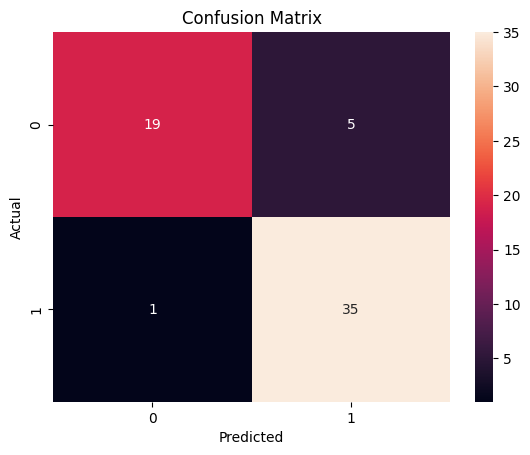

In [7]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Cross Validation

In [8]:
#cross validation for 10 folds

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_tuned, X_train, y_train, cv=10, scoring="f1") #scoring can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
    
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #standard deviation is calculated for the scores of each fold
#A low standard deviation indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.
#get the variance of the scores
print("Variance:", scores.var()) #variance is calculated for the scores of each fold
#A low variance indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.

#conclusions:
#mean F1 score of 0.825 indicates that the model is achieving a relatively high level of precision and recall on average. 
#This is a good sign and suggests that the model is likely to perform well on new, unseen data.
#The standard deviation is 0.042, which is a good sign.
#The variance is 0.0018, which is a good sign.


Fold 0 : 0.7857142857142856
Fold 1 : 0.8461538461538461
Fold 2 : 0.8799999999999999
Fold 3 : 0.8666666666666666
Fold 4 : 0.7692307692307693
Fold 5 : 0.8461538461538461
Fold 6 : 0.8275862068965517
Fold 7 : 0.8799999999999999
Fold 8 : 0.7826086956521738
Fold 9 : 0.7692307692307692

Mean: 0.8253345085698907
Standard Deviation: 0.04271704023457498
Variance: 0.0018247455264022976


Learning Curve

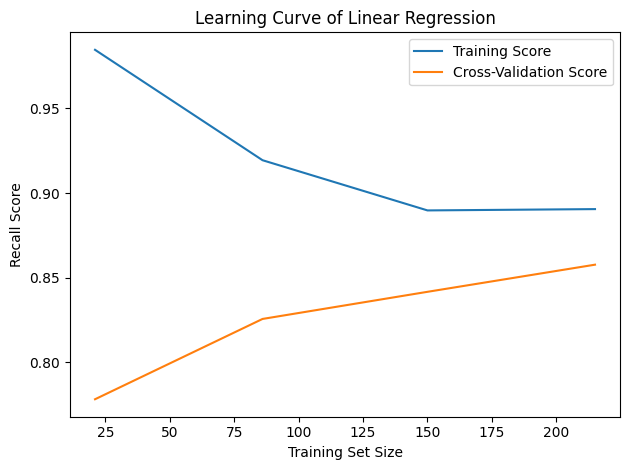

In [10]:
#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(lr_tuned, X_train, y_train, cv=10, scoring="recall",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,4))
#train_sizes: the proportion of the training set to include in the learning curve.
#train_sizes=np.linspace(0.1,1.0,4) means the training set size will be 10%, 40%, 70%, and 100% of the training set.
#train_scores: the scores for each training subset
#test_scores: the scores for each testing subset

#plot the learning curve
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Recall Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()

#Bias and Variance:
#Bias refers to the difference between the expected predictions of a model and the actual true values. High Bias --> Underfitting
#Variance refers to the variability of the model's predictions for a given data point. High Variance --> Overfitting

#Conclusions:
#1. From the learning curve, we can conclude that we have a good balance between bias and variance.
#2. The model is neither overfitting nor underfitting.
#3. The learning curve shows that the model is just right.

Precision and Recall Tradeoff

Decision function scores:
 [-1.57357205 -1.53227745 -1.83046615  0.88800651  0.35965771  0.47625366
  1.03649875  0.08685627  0.55572726 -0.99906148  0.5188455  -0.44073708
 -0.87163538  0.39365371  0.76546626  0.77253712  1.29104185  0.87657537
  0.89044981  0.39797507  1.26506662  0.30379702 -1.17877331  1.13231321
 -0.63979497 -1.37892524 -1.15054744  0.28845169 -0.88721167 -0.2367921
  0.13649143 -0.58058049  0.01121273  0.54845275  0.82609043  0.6903328
  0.74987615  0.09308639  0.55005226  0.39857055  0.49127221  1.109225
  0.09027808  0.44967473  1.15809336  0.18330198 -0.13290449 -0.62454038
 -1.79585233 -1.27578068  0.26664386  0.17743626  0.32530233 -0.77924884
  0.27759063  0.17401106 -0.7227738   0.30956211 -1.52207048  0.44769461]


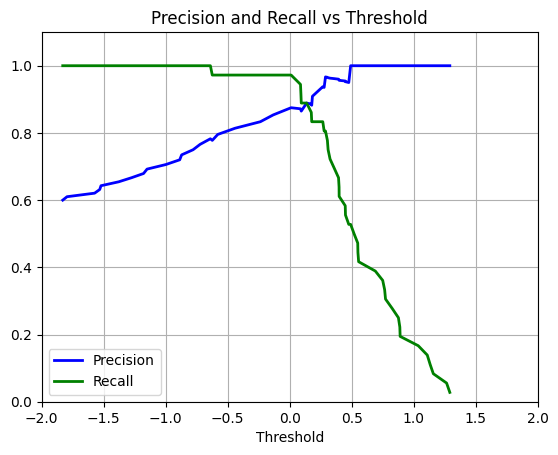

In [102]:
#plot precision and recall vs threshold
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
#use the decision function to calculate the precision and recall for each threshold
y_score = lr_tuned.decision_function(X_test)
print("Decision function scores:\n",y_score)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
#y_test: the actual labels
#y_score: the decision function scores
#plot the precision and recall for each threshold
plt.plot(thresholds, precision[:-1], "b-", label="Precision", linewidth=2)
plt.plot(thresholds, recall[:-1], "g-", label="Recall", linewidth=2)
plt.title("Precision and Recall vs Threshold")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.axis([-2,2,0,1.1])
plt.grid(True)
plt.show()


PRC

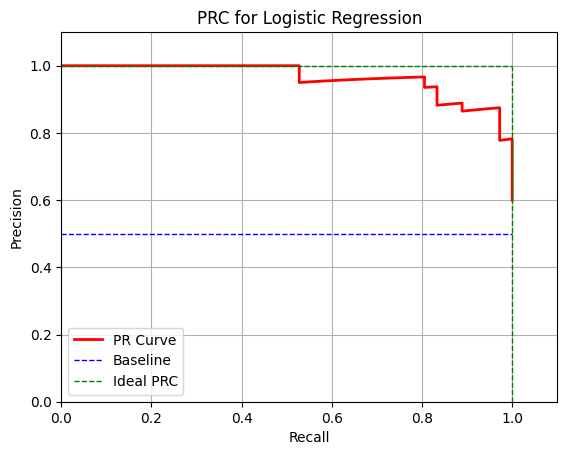

AUC_PRC: 0.9636829978526293
Precision: (61,)
Recall: (61,)


In [111]:
#plot Precision vs Recall
plt.plot(recall, precision, "r-", linewidth = 2, label = 'PR Curve') 
#plot the baseline
plt.plot([0,1],[0.5,0.5], "b--", linewidth = 1, label = 'Baseline')
#plot the ideal PRC at the top-right corner
plt.plot([1,1],[0,1], "g--", linewidth = 1, label = 'Ideal PRC')
plt.plot([0,1],[1,1], "g--", linewidth = 1)
plt.title("PRC for Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1.1,0,1.1])
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

#get the AUC for Precision-Recall Curve
from sklearn.metrics import auc
auc_PRC = auc(recall, precision)
print("AUC_PRC:", auc_PRC)

#print the shape of the precision and recall arrays
print("Precision:", precision.shape)
print("Recall:", recall.shape)

#conclusions:
#1. The AUC_PRC is 0.96, which indicates that the model is performing well.
#2. The PRC is close to the top-left corner of the plot, which is a good sign.
#3. The trade-off between precision and recall is acceptable.
#that is, when recall is taken to a high value, precision is sufficiently maintained.

ROC 

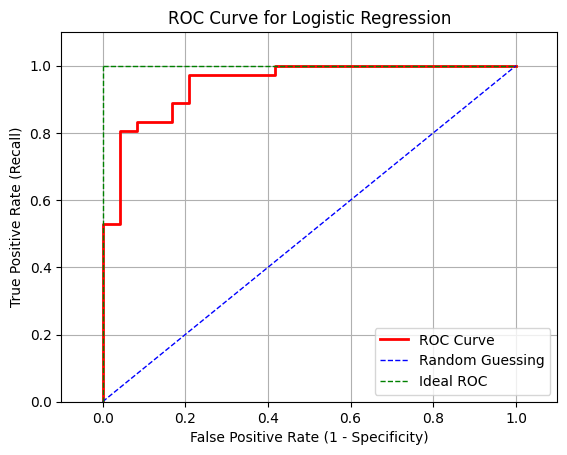

AUC_ROC: 0.9479166666666666


In [108]:
#plot Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr, "r-", linewidth = 2, label = "ROC Curve")
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
#plot the ideal ROC at the top-left corner
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)
plt.title("ROC Curve for Logistic Regression")
plt.xlabel("False Positive Rate (1 - Specificity)") #specificity = true negative rate
plt.ylabel("True Positive Rate (Recall)")
plt.axis([-0.1,1.1,0,1.1])
plt.grid(True)
plt.legend(loc="best")
plt.show()

#get the AUC for ROC Curve
from sklearn.metrics import auc
auc_ROC = auc(fpr, tpr)
print("AUC_ROC:", auc_ROC)

#conclusions:
#1. The AUC for ROC Curve is 0.94, which indicates that the model is performing well.
#2. The ROC Curve is close to the top left corner, which is a good sign.
#3. The Trade-off between the True Positive Rate and the False Positive Rate is acceptable.
#that is, the model is achieving a relatively high level of True Positive Rate 
#while maintaining a relatively low level of False Positive Rate.
